In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [4]:
from tensorflow import keras

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
len(train_labels)

60000

In [12]:
test_labels.shape

(10000,)

In [13]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

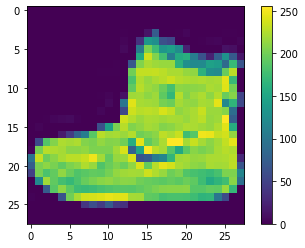

In [14]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [17]:
train_images = train_images/255.0

In [18]:
test_images = test_images/255.0

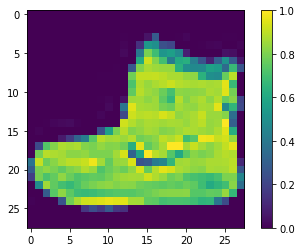

In [19]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

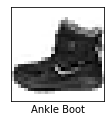

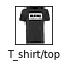

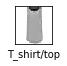

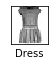

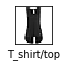

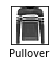

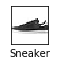

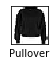

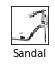

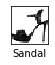

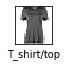

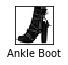

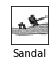

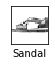

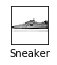

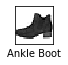

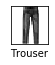

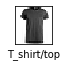

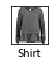

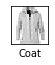

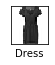

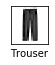

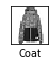

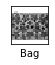

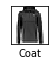

In [20]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [21]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation='relu'),keras.layers.Dense(10, activation='softmax')])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4961 - accuracy: 0.8258
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3730 - accuracy: 0.8662
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3351 - accuracy: 0.8767
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3099 - accuracy: 0.8871
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2934 - accuracy: 0.8923


In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [27]:
history_dict['loss']

[0.4960587858041128,
 0.37296427064140636,
 0.33510408524076146,
 0.30993311406672003,
 0.2933740581333637]

In [28]:
import pandas as pd
history_df = pd.DataFrame(history_dict)
history_df

,loss,accuracy
0,0.496059,0.825817
1,0.372964,0.866150
2,0.335104,0.876700
3,0.309933,0.887067
4,0.293374,0.892250


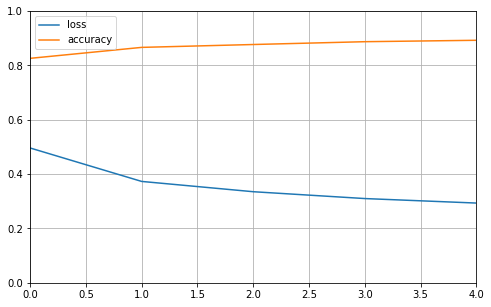

In [29]:
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [31]:
print('\nTest Accuracy: ',test_acc)
print('\nTest Loss: ', test_loss)


Test Accuracy:  0.8747

Test Loss:  0.3563556978225708


In [32]:
predictions = model.predict(test_images)

In [33]:
predictions[0]

array([5.9200130e-07, 6.4992058e-08, 5.1038563e-07, 5.0109228e-09,
       1.3981161e-06, 8.9465268e-04, 1.5747935e-06, 9.9365376e-03,
       2.5992535e-05, 9.8913878e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])

9

In [35]:
class_names[np.argmax(predictions[0])]

'Ankle Boot'

In [36]:
test_labels[0] == class_names[np.argmax(predictions[0])]

False

In [40]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else: 
        color = 'red'
        plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label], color=color))

In [42]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<function matplotlib.pyplot.show(*args, **kw)>

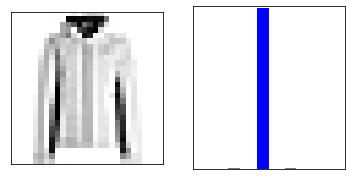

In [49]:
i=6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show

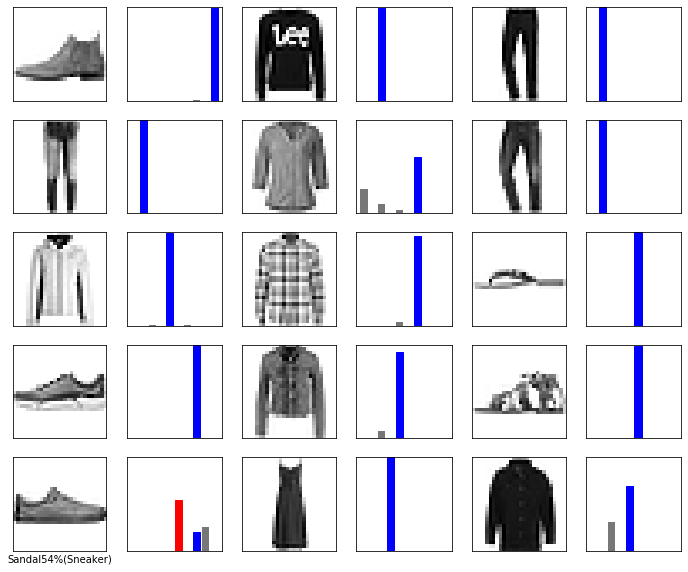

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [52]:
img = test_images[0]

In [53]:
print(img.shape)

(28, 28)


In [54]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [55]:
predictions_single = model.predict(img)

In [56]:
predictions_single

array([[5.9200011e-07, 6.4991930e-08, 5.1038518e-07, 5.0109130e-09,
        1.3981147e-06, 8.9465047e-04, 1.5747876e-06, 9.9365143e-03,
        2.5992458e-05, 9.8913878e-01]], dtype=float32)

In [57]:
np.argmax(predictions_single[0])

9

# Using CNN

In [15]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [16]:
train_images.shape

(60000, 28, 28, 1)

In [17]:
train_images, test_images = train_images/255.0, test_images/255.0

In [19]:
from tensorflow.keras import models, layers
model = models.Sequential()

In [20]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size = 32, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 39s 820us/sample - loss: 0.5298 - accuracy: 0.8065 - val_loss: 0.3746 - val_accuracy: 0.8658
Epoch 2/10
48000/48000 [==============================] - 38s 793us/sample - loss: 0.3396 - accuracy: 0.8765 - val_loss: 0.3427 - val_accuracy: 0.8753
Epoch 3/10
48000/48000 [==============================] - 39s 807us/sample - loss: 0.2930 - accuracy: 0.8918 - val_loss: 0.2989 - val_accuracy: 0.8936
Epoch 4/10
48000/48000 [==============================] - 39s 822us/sample - loss: 0.2603 - accuracy: 0.9032 - val_loss: 0.2890 - val_accuracy: 0.8928
Epoch 5/10
48000/48000 [==============================] - 40s 824us/sample - loss: 0.2343 - accuracy: 0.9133 - val_loss: 0.2794 - val_accuracy: 0.8955
Epoch 6/10
48000/48000 [==============================] - 39s 819us/sample - loss: 0.2135 - accuracy: 0.9208 - val_loss: 0.2641 - val_accuracy: 0.9057
Epoch 7/10
48000/48000 [====================

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
import pandas as pd

In [27]:
history_df = pd.DataFrame(history_dict)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.529761,0.806500,0.374621,0.865833
1,0.339614,0.876542,0.342664,0.875333
2,0.292988,0.891771,0.298853,0.893583
3,0.260280,0.903208,0.289036,0.892750
4,0.234321,0.913333,0.279430,0.895500
5,0.213546,0.920812,0.264086,0.905667
6,0.195012,0.926750,0.251404,0.909583
7,0.178291,0.933833,0.261151,0.905500
8,0.160722,0.940104,0.263288,0.913167
9,0.147018,0.945292,0.263105,0.911000


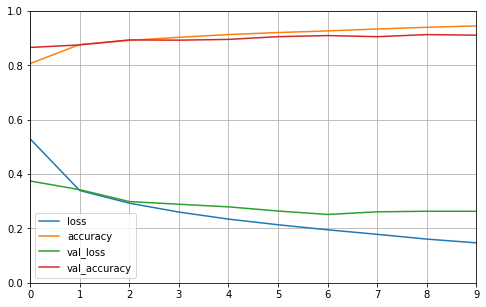

In [30]:
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Saving Model

In [32]:
#saving model weights
model.save_weights('saved')

In [33]:
#to load the weights we need to create a new instance of the same model architecture
new_instance = model
new_instance.load_weights('saved')
new_instance.weights[0][0][0][0]

<tf.Tensor: id=57599, shape=(32,), dtype=float32, numpy=
array([ 0.06822895, -0.12840723, -0.14111574,  0.17816511, -0.09736761,
        0.25515002, -0.23889284, -0.04239338,  0.0338692 ,  0.28726363,
        0.19720662, -0.35426098, -0.10733178, -0.13759902, -0.20592867,
        0.13574828, -0.9898483 , -0.23545398,  0.04864403, -0.01424523,
        0.18087742,  0.01292589,  0.10745239, -0.09910858,  0.05046232,
        0.02028862, -0.07881186, -0.24130732,  0.04531702, -0.4444117 ,
       -0.04754543, -0.18451306], dtype=float32)>

In [34]:
#saving and loading an entire model
model.save('my_model.h5') #HD5 format
new_model = keras.models.load_model('my_model.h5')

In [37]:
test_loss, test_acc = new_model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [38]:
print('\nTest Accuracy: ',test_acc)
print('\nTest Loss: ', test_loss)


Test Accuracy:  0.9063

Test Loss:  0.2803301687479019


In [39]:
predictions = model.predict(test_images)

In [40]:
predictions[0]

array([1.99190808e-07, 2.65998362e-10, 5.74224224e-09, 8.50444195e-08,
       2.22329117e-11, 1.02182939e-05, 6.12426643e-09, 1.03755665e-05,
       4.39012844e-08, 9.99979138e-01], dtype=float32)

In [41]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0] == class_names[np.argmax(predictions[0])]

False